In [ ]:
# from data_preparation import download_files, files, output_folder
# from data_preparation import data_import, data_cleaning, weather_data, geo_data, convert_date, population_data

In [ ]:
# download_files(files, output_folder)

In [ ]:
# df = data_import()

In [ ]:
# df = data_cleaning(df)

In [2]:
# imports
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/mareikekeller/air_quality/data/cleaned_data.csv")
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Population,Co,No2,...,Wind-speed,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.06667,15.45000,269997.0,0.1,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26266,11.39454,124579.0,0.1,25.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.30639,14.28611,193814.0,0.1,14.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.79941,13.04399,146631.0,0.1,21.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.20849,16.37208,NaN,0.1,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Spalten mit zu vielen fehlenden Werten entfernen

# Berechnen, wie viele Prozent der Werte pro Spalte fehlen
missing_percent = df.isna().mean() * 100  
missing_percent

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
City            0.000000
Latitude        0.166899
Longitude       0.166899
Population     78.556625
Co             37.274025
No2            16.888087
O3             22.073094
Pm10           20.167772
Pm25           15.503401
Pressure       23.163098
So2            31.443192
Temperature    22.791071
Wind-gust      54.213733
Wind-speed     24.317465
Dew            40.994643
Humidity       22.895021
Tavg           17.349551
Tmin           18.792289
Tmax           18.930339
Prcp           38.730509
Wdir           30.998365
Wspd           26.903066
Pres           29.029327
dtype: float64

In [5]:
# Spalten auswählen, die weniger als 53% fehlende Werte haben
df_cleaned = df.loc[:, missing_percent <= 53]

df_cleaned.head()


,Year,Month,Day,Country,City,Latitude,Longitude,Co,No2,O3,...,Wind-speed,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.06667,15.45000,0.1,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26266,11.39454,0.1,25.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.30639,14.28611,0.1,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.79941,13.04399,0.1,21.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.20849,16.37208,0.1,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df_cleaned.copy()
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'City', 'Latitude', 'Longitude',
       'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'Pressure', 'So2', 'Temperature',
       'Wind-speed', 'Dew', 'Humidity', 'Tavg', 'Tmin', 'Tmax', 'Prcp', 'Wdir',
       'Wspd', 'Pres'],
      dtype='object')

In [7]:
# Die Spalten Temperature, Wind-Speed, Pressure mussen entfernt werden, weil das mit der Cleaning-Funktion noch nicht klappt.

df = df.drop(columns=['Temperature', 'Wind-speed', 'Pressure'])
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'City', 'Latitude', 'Longitude',
       'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'So2', 'Dew', 'Humidity', 'Tavg',
       'Tmin', 'Tmax', 'Prcp', 'Wdir', 'Wspd', 'Pres'],
      dtype='object')

In [8]:
df.shape

(1695041, 22)

In [9]:
weather_vars = ['Dew', 'Humidity', 'Tavg', 'Tmin', 'Tmax', 'Prcp', 'Wdir', 'Wspd', 'Pres']

df_weather = df_cleaned.groupby("City")[weather_vars].mean()
df_weather.head()

,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
City,,,,,,,,,
Abha,6.625587,49.484155,19.870387,14.288952,26.313911,1.044238,184.230294,11.017218,1023.049127
Abidjan,24.954464,87.609299,27.390073,25.005692,30.192455,5.451320,219.990735,11.843018,1011.536731
Abu dhabi,18.708406,56.643848,29.327553,25.332278,34.524937,0.280992,192.961233,11.260591,1008.106417
Accra,23.694781,82.775967,27.677889,24.942758,31.597766,3.250861,217.167180,15.009784,1011.533898
Adana,12.681491,67.262633,19.718012,14.728687,25.341489,1.869606,114.379398,9.179633,1012.414482


In [10]:
df_weather.isna().sum()

Dew         16
Humidity     0
Tavg        38
Tmin        38
Tmax        38
Prcp        62
Wdir        39
Wspd        39
Pres        39
dtype: int64

In [11]:
df_missing = df_weather[df_weather.isna().any(axis=1)]
df_missing


,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
City,,,,,,,,,
Ashkelon,NaN,58.802861,20.621765,15.294544,26.205925,1.171291,189.497865,11.601537,1013.255935
Athens,9.518540,59.817727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Auckland,NaN,63.777809,14.886853,11.904382,18.008367,3.976972,186.874104,17.798327,1016.673147
Barcelona,10.631043,72.201637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boston,NaN,67.307126,11.301124,7.295288,15.612323,3.091374,193.756259,17.788583,1015.855040
...,...,...,...,...,...,...,...,...,...
Vitória,20.135923,82.843162,24.782559,21.726557,29.000340,NaN,131.267278,5.909117,1016.306002
Wrocław,6.012321,75.956804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zaragoza,6.369231,56.147978,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(df_missing)

75

In [13]:
df_weather = df_weather.dropna(subset=weather_vars)
df.shape

(1695041, 22)

In [14]:
df_weather.isna().sum()

Dew         0
Humidity    0
Tavg        0
Tmin        0
Tmax        0
Prcp        0
Wdir        0
Wspd        0
Pres        0
dtype: int64

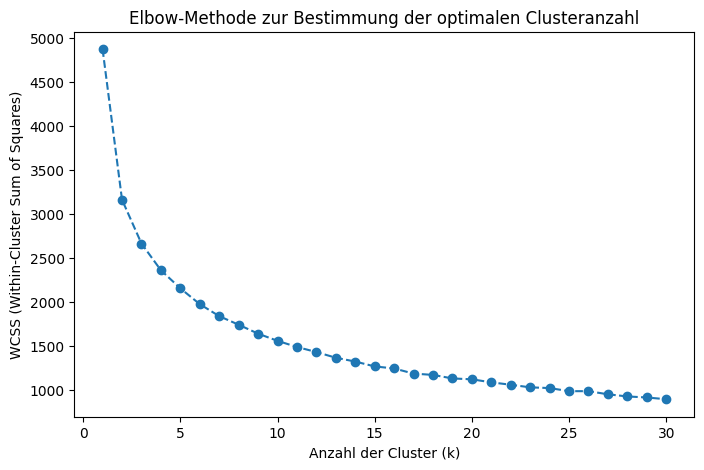

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Wetterdaten skalieren (K-Means ist empfindlich gegenüber Skalen)
scaler = StandardScaler()
df_weather_scaled = scaler.fit_transform(df_weather)

# Optimale Clusteranzahl bestimmen (Elbow-Methode)
wcss = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_weather_scaled)
    wcss.append(kmeans.inertia_)

# Elbow-Plot anzeigen
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 31), wcss, marker="o", linestyle="--")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow-Methode zur Bestimmung der optimalen Clusteranzahl")
plt.show()


In [16]:
# K-Means mit k=5 durchführen
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_weather["Weather_Cluster"] = kmeans.fit_predict(df_weather_scaled)

In [17]:
df_weather.head()

,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres,Weather_Cluster
City,,,,,,,,,,
Abha,6.625587,49.484155,19.870387,14.288952,26.313911,1.044238,184.230294,11.017218,1023.049127,0
Abidjan,24.954464,87.609299,27.390073,25.005692,30.192455,5.451320,219.990735,11.843018,1011.536731,1
Abu dhabi,18.708406,56.643848,29.327553,25.332278,34.524937,0.280992,192.961233,11.260591,1008.106417,1
Accra,23.694781,82.775967,27.677889,24.942758,31.597766,3.250861,217.167180,15.009784,1011.533898,1
Adana,12.681491,67.262633,19.718012,14.728687,25.341489,1.869606,114.379398,9.179633,1012.414482,2


In [24]:
df_weather.shape

(541, 10)

In [ ]:
# Clusterzuordnung auf Grund von Schadstoffen laden
# Das sind aber noch die alten Schadstoffdaten. Könnte man nochmal mit den neu runtergeladenen machen - wenn Zeit ist.

df_pollutants = pd.read_csv("WORK/df_pollutants.csv", index_col=0)  # Index wiederherstellen
df_pollutants.head()  # Überprüfen, ob die Daten korrekt geladen wurden

,Co,No2,O3,So2,Pm10,Pm25,Cluster
City,,,,,,,
Abu dhabi,0.100047,12.196341,27.721309,4.985944,79.439340,97.846117,1
Adana,4.047877,11.253878,16.466835,4.181442,31.489910,68.214783,2
Adapazarı,18.371643,12.695786,16.357013,19.657261,38.064474,72.090748,3
Adelaide,2.448863,20.026720,23.991919,8.578091,13.293801,16.636843,0
Aguascalientes,7.194328,16.041774,44.532891,4.886259,70.222643,106.460538,1


In [23]:
df_pollutants.shape

(404, 7)

In [25]:
df_combined = df_weather.merge(df_pollutants, left_index=True, right_index=True)

In [26]:
df_combined.head()

,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres,Weather_Cluster,Co,No2,O3,So2,Pm10,Pm25,Cluster
City,,,,,,,,,,,,,,,,,
Abu dhabi,18.708406,56.643848,29.327553,25.332278,34.524937,0.280992,192.961233,11.260591,1008.106417,1,0.100047,12.196341,27.721309,4.985944,79.439340,97.846117,1
Adana,12.681491,67.262633,19.718012,14.728687,25.341489,1.869606,114.379398,9.179633,1012.414482,2,4.047877,11.253878,16.466835,4.181442,31.489910,68.214783,2
Adapazarı,10.086368,77.667904,16.367853,11.423067,21.490315,2.729866,192.957547,8.032626,1015.790016,0,18.371643,12.695786,16.357013,19.657261,38.064474,72.090748,3
Adelaide,8.642556,61.707252,15.182195,12.344380,21.898692,1.798432,164.459925,14.434696,1017.156805,0,2.448863,20.026720,23.991919,8.578091,13.293801,16.636843,0
Aguascalientes,3.022482,37.562302,19.272303,10.047648,28.098575,0.928605,141.161022,9.792017,1019.084265,3,7.194328,16.041774,44.532891,4.886259,70.222643,106.460538,1


In [27]:
len(df_combined)

355

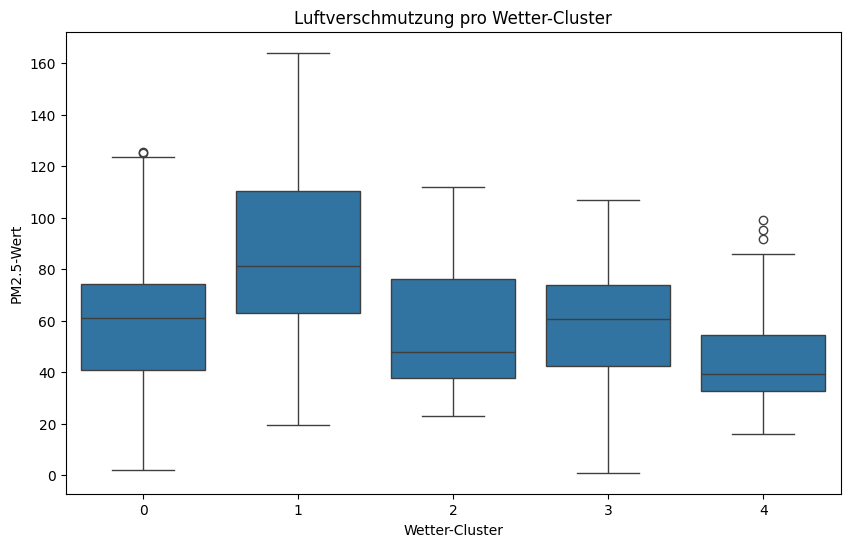

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="Weather_Cluster", y="Pm25", data=df_combined)
plt.xlabel("Wetter-Cluster")
plt.ylabel("PM2.5-Wert")
plt.title("Luftverschmutzung pro Wetter-Cluster")
plt.show()

In [36]:
# Abweichung vom Cluster-Durchschnitt berechnen
df_combined["Pm25_deviation"] = df_combined.groupby("Weather_Cluster")["Pm25"].transform(lambda x: x - x.mean())

# Städte mit deutlich höherer PM2.5-Belastung als ihr Cluster-Durchschnitt
outliers = df_combined[df_combined["Pm25_deviation"] > df_combined["Pm25_deviation"].std() * 1.5]

outliers

,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres,Weather_Cluster,Co,No2,O3,So2,Pm10,Pm25,Cluster,Pm25_deviation
City,,,,,,,,,,,,,,,,,,
Aguascalientes,3.022482,37.562302,19.272303,10.047648,28.098575,0.928605,141.161022,9.792017,1019.084265,3,7.194328,16.041774,44.532891,4.886259,70.222643,106.460538,1,46.766885
Amman,7.282463,53.013514,19.358190,14.501112,24.755561,0.247362,237.812372,9.807533,1014.695753,3,18.969777,9.565977,13.517397,3.995421,29.047901,100.400000,2,40.706348
Anyang,6.581941,56.820350,15.417010,9.992033,21.261614,2.562880,159.327966,11.095339,1015.967458,0,9.118185,15.361636,27.066292,9.106897,76.001829,125.502012,1,63.360082
Changchun,-0.809023,58.276092,6.526877,0.671772,12.766779,4.579568,214.848460,11.895708,1014.864979,4,6.341171,13.958829,35.450744,6.689776,48.954662,91.848385,1,47.731249
Changsha,14.154700,74.517724,17.556194,13.969571,22.803746,5.397217,256.001561,9.563163,1015.279553,0,7.170962,12.408443,23.333066,4.627790,51.147210,109.045705,1,46.903775
Chengdu,13.025398,70.180070,18.277649,14.740210,22.226507,2.665508,157.541342,6.297888,1014.779279,0,6.943275,16.096290,20.378531,3.494408,54.619518,107.807018,1,45.665087
Chongqing,14.066855,73.631898,18.743200,15.604871,23.443125,3.909040,161.201711,7.949643,1013.853494,2,7.736101,15.907388,16.535594,4.533486,47.992868,100.095465,1,42.878829
Dammam,13.864455,46.604265,28.762303,22.742028,35.122441,0.000000,218.839567,14.972933,1007.005610,3,9.960784,2.452532,16.861769,1.890459,16.794508,106.813859,2,47.120206
Delhi,16.100339,61.373659,25.679522,19.430949,32.349018,4.526818,199.587311,5.483441,1007.692861,1,9.360453,16.459586,9.186912,5.432543,130.130135,164.135800,1,78.332756


In [46]:
len(outliers)

36

In [49]:
type(outliers)

pandas.core.frame.DataFrame

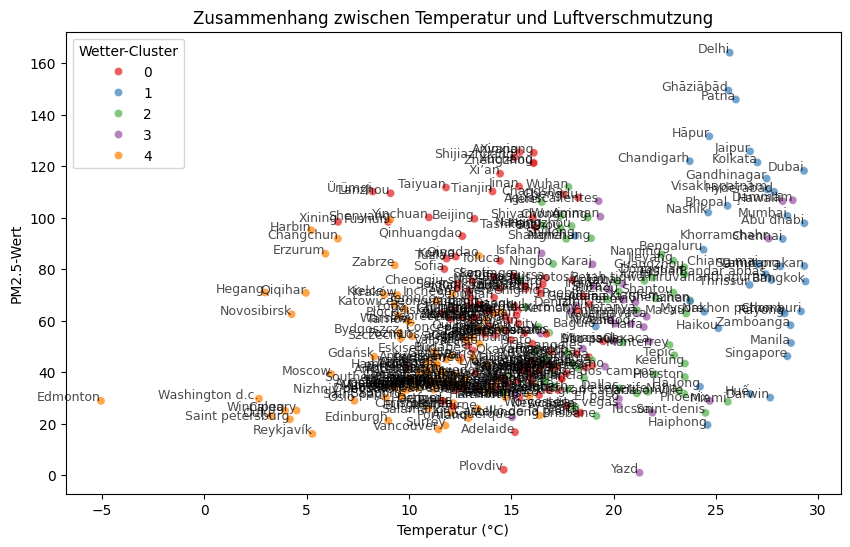

In [38]:
# Sicherstellen, dass "City" eine normale Spalte ist
df_combined = df_combined.reset_index()

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=df_combined["Tavg"], 
    y=df_combined["Pm25"], 
    hue=df_combined["Weather_Cluster"], 
    palette="Set1", 
    alpha=0.7
)

# Städtenamen als Labels hinzufügen
for i, row in df_combined.iterrows():
    plt.text(row["Tavg"], row["Pm25"], row["City"], fontsize=9, ha="right", alpha=0.7)

# Achsen & Titel
plt.xlabel("Temperatur (°C)")
plt.ylabel("PM2.5-Wert")
plt.title("Zusammenhang zwischen Temperatur und Luftverschmutzung")
plt.legend(title="Wetter-Cluster")

plt.show()


## Analyse zum Einfluss der Jahreszeit

In [39]:
df_city_avg = df.groupby("City")[["Year", "Month", "Pm25"]].mean().reset_index()
df_city_avg.head()

,City,Year,Month,Pm25
0,Abha,2019.962415,6.582005,NaN
1,Abidjan,2022.104193,6.601652,69.153588
2,Abu dhabi,2020.870583,5.965489,97.833964
3,Accra,2021.891994,6.521148,70.522508
4,Adana,2020.193987,5.706156,68.214783


In [40]:
len(df_city_avg)

616

In [41]:
df_combined.head()

,index,City,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres,Weather_Cluster,Co,No2,O3,So2,Pm10,Pm25,Cluster,Pm25_deviation
0,0,Abu dhabi,18.708406,56.643848,29.327553,25.332278,34.524937,0.280992,192.961233,11.260591,1008.106417,1,0.100047,12.196341,27.721309,4.985944,79.439340,97.846117,1,12.043074
1,1,Adana,12.681491,67.262633,19.718012,14.728687,25.341489,1.869606,114.379398,9.179633,1012.414482,2,4.047877,11.253878,16.466835,4.181442,31.489910,68.214783,2,10.998147
2,2,Adapazarı,10.086368,77.667904,16.367853,11.423067,21.490315,2.729866,192.957547,8.032626,1015.790016,0,18.371643,12.695786,16.357013,19.657261,38.064474,72.090748,3,9.948818
3,3,Adelaide,8.642556,61.707252,15.182195,12.344380,21.898692,1.798432,164.459925,14.434696,1017.156805,0,2.448863,20.026720,23.991919,8.578091,13.293801,16.636843,0,-45.505087
4,4,Aguascalientes,3.022482,37.562302,19.272303,10.047648,28.098575,0.928605,141.161022,9.792017,1019.084265,3,7.194328,16.041774,44.532891,4.886259,70.222643,106.460538,1,46.766885


In [42]:
len(df_combined)

355

In [44]:
# Nur die relevanten Spalten behalten
df_monthly = df_cleaned[["City", "Year", "Month", "Pm25"]].copy()

# Sicherstellen, dass "City" ein String ist
df_monthly["City"] = df_monthly["City"].astype(str)
df_combined["City"] = df_combined["City"].astype(str)

# Merge mit den Wetter-Clustern aus df_combined
df_with_month = df_monthly.merge(df_combined[["City", "Weather_Cluster", "Cluster"]], on="City", how="left")

# Überprüfen, ob der Merge funktioniert hat
print(df_with_month.head())
print(df_with_month.isna().sum())  # Prüfen, ob Werte fehlen



        City  Year  Month  Pm25  Weather_Cluster  Cluster
0       Graz  2014     12   NaN              NaN      NaN
1  Innsbruck  2014     12   NaN              NaN      NaN
2       Linz  2014     12  74.0              NaN      NaN
3   Salzburg  2014     12   NaN              NaN      NaN
4     Vienna  2014     12  65.0              NaN      NaN
City                    0
Year                    0
Month                   0
Pm25               262789
Weather_Cluster    650122
Cluster            650122
dtype: int64


In [50]:
index_liste = outliers.index.tolist()
print(index_liste)

['Aguascalientes', 'Amman', 'Anyang', 'Changchun', 'Changsha', 'Chengdu', 'Chongqing', 'Dammam', 'Delhi', 'Erzurum', 'Ghāziābād', 'Hangzhou', 'Harbin', 'Hefei', 'Hāpur', 'Jaipur', 'Jinan', 'Lanzhou', 'Nanjing', 'Patna', 'Qingdao', 'Shenyang', 'Shijiazhuang', 'Shiyan', 'Suzhou', 'Taiyuan', 'Tianjin', 'Wuhan', 'Wuxi', 'Xinxiang', 'Xi’an', 'Xuchang', 'Yinchuan', 'Zhengzhou', 'Ürümqi', 'Ḩawallī']


In [52]:
# Hier weitermachen: Die Grafik nur mit den 36 Outlier-Städten erstellen.

# Nur die relevanten Städte auswählen
selected_cities = index_liste
df_outlier_cities = df_with_month[df_with_month["City"].isin(selected_cities)]

In [53]:
df_outlier_cities

,City,Year,Month,Pm25,Weather_Cluster,Cluster
65,Anyang,2014,12,147.0,0.0,1.0
67,Changchun,2014,12,176.0,4.0,1.0
68,Changsha,2014,12,166.0,0.0,1.0
70,Chengdu,2014,12,184.0,0.0,1.0
71,Chongqing,2014,12,169.0,2.0,1.0
...,...,...,...,...,...,...
1694779,Patna,2025,3,129.0,1.0,1.0
1694803,Amman,2025,3,NaN,3.0,2.0
1694857,Ḩawallī,2025,3,NaN,3.0,1.0
1694864,Aguascalientes,2025,3,NaN,3.0,1.0


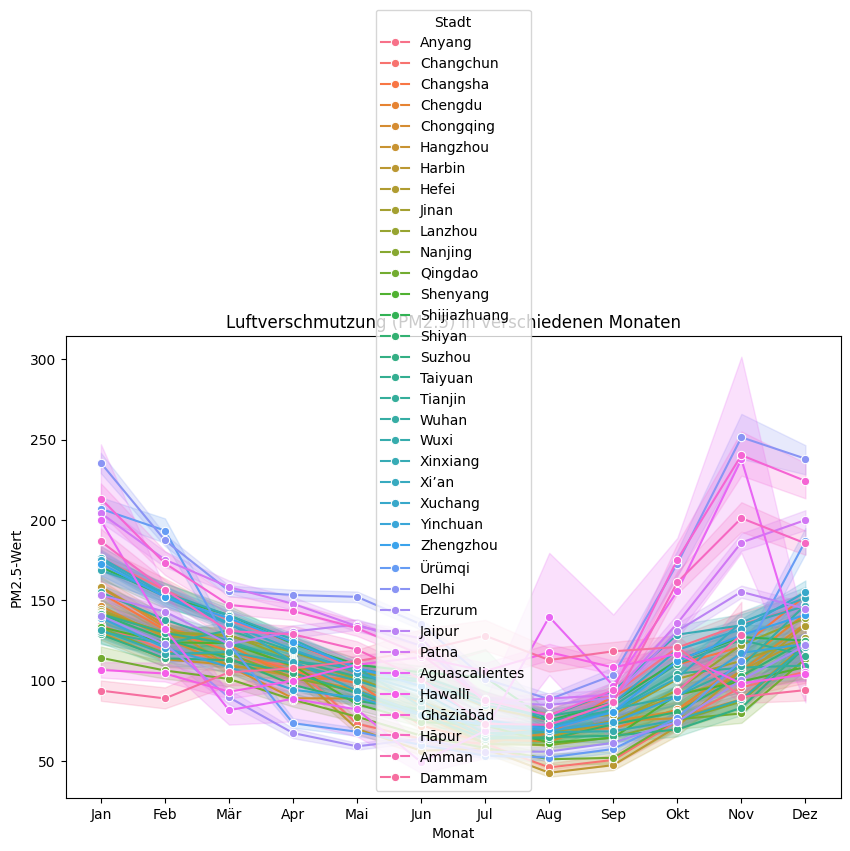

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_outlier_cities, x="Month", y="Pm25", hue="City", marker="o")
plt.xlabel("Monat")
plt.ylabel("PM2.5-Wert")
plt.title("Luftverschmutzung (PM2.5) in verschiedenen Monaten")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.legend(title="Stadt")
plt.show()

In [ ]:
# Alle Outlier sind zu chaotisch. Reduzieren auf 